In [2]:
import pandas as pd 

import json

# Replace 'your_file.json' with the path to your JSON file
with open('dataset.json', 'r') as file:
    data = json.load(file)

femaleData = data["mean_time_using_phone"]['female']
maleData = data["mean_time_using_phone"]['male']

print(len(data["mean_time_using_phone"]['male']))
print(len(data["mean_time_using_phone"]['female']))
print(femaleData)
print(maleData)

50
50
[11, 10, 11, 10, 11, 12, 12, 10, 9, 9, 9, 10, 8, 7, 12, 9, 7, 8, 9, 8, 7, 7, 9, 9, 12, 10, 9, 13, 9, 9, 10, 9, 6, 12, 8, 11, 8, 8, 11, 12, 9, 10, 11, 14, 12, 7, 11, 10, 9, 11]
[12, 7, 7, 10, 8, 10, 11, 9, 9, 13, 4, 9, 12, 11, 9, 9, 7, 12, 10, 13, 11, 10, 6, 12, 11, 9, 10, 12, 8, 9, 13, 10, 9, 7, 10, 7, 10, 8, 11, 10, 11, 7, 15, 8, 9, 9, 11, 13, 10, 13]


Assumption 1: the data is continuous
Assumption 2: the group is independent
Assumption 3: there is no relationship between the observations

C:\Users\User\AppData\Local\Temp\ipykernel_21108\2633232888.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([femaleData, maleData], labels=['Female', 'Male'])


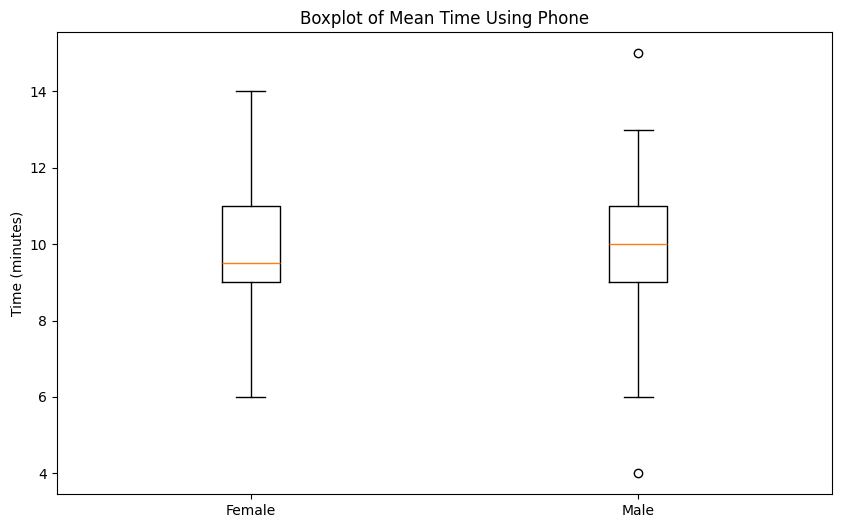

There is 2 significant outliers in male data


In [3]:
import matplotlib.pyplot as plt

# Create a boxplot for both male and female data
plt.figure(figsize=(10, 6))
plt.boxplot([femaleData, maleData], labels=['Female', 'Male'])
plt.title('Boxplot of Mean Time Using Phone')
plt.ylabel('Time (minutes)')
plt.show()
print("There is 2 significant outliers in male data")

It is recommended that the researcher remove the outliers because it brings a negative result to independent t-test

In [4]:
unique_male_values = set(maleData)
print(unique_male_values)

outliers_male = [4, 15]

maleData = [x for x in maleData if x not in outliers_male]
print(maleData)

unique_male_values = set(maleData)
print(unique_male_values)

{4, 6, 7, 8, 9, 10, 11, 12, 13, 15}
[12, 7, 7, 10, 8, 10, 11, 9, 9, 13, 9, 12, 11, 9, 9, 7, 12, 10, 13, 11, 10, 6, 12, 11, 9, 10, 12, 8, 9, 13, 10, 9, 7, 10, 7, 10, 8, 11, 10, 11, 7, 8, 9, 9, 11, 13, 10, 13]
{6, 7, 8, 9, 10, 11, 12, 13}


In [5]:
from scipy.stats import shapiro

# Perform Shapiro-Wilk test for normality


stat_female, p_female = shapiro(femaleData)
stat_male, p_male = shapiro(maleData)

print(f"Female Data: Statistics={stat_female}, p-value={p_female}")
print(f"Male Data: Statistics={stat_male}, p-value={p_male}")

# Interpret the p-value
alpha = 0.05
if p_female > alpha:
    print('Female Data: (fail to reject H0)')
else:
    print('Female Data: (reject H0)')

if p_male > alpha:
    print('Male Data: (fail to reject H0)')
else:
    print('Male Data: (reject H0)')

Female Data: Statistics=0.9638767847871548, p-value=0.12919719507959687
Male Data: Statistics=0.9518706986857468, p-value=0.047487816421818464
Female Data: (fail to reject H0)
Male Data: (reject H0)


The problem is that the female data is distributely normal, while the male data is not normally distributed, thus it is more probable to use both to be sure

In [6]:
from scipy.stats import levene

# Perform Levene's test for equal variances
stat, p_value = levene(femaleData, maleData)

print(f"Levene's Test: Statistics={stat}, p-value={p_value}")

# Interpret the p-value
if p_value > alpha:
    print('Equal variances (fail to reject H0)')
else:
    print('Unequal variances (reject H0)')

Levene's Test: Statistics=0.03422154888156142, p-value=0.8536266117489486
Equal variances (fail to reject H0)


and since the levene's test failed to reject the null hypothesis, thus its variance is equal. Therefore, we can proceed in using two-tailed t-test and wilcoxon rank-sum

In [7]:
from scipy.stats import ttest_ind

# Perform two-sample independent t-test
t_stat, p_value_ttest = ttest_ind(femaleData, maleData, equal_var=True)

print(f"Two-sample t-test: t-statistic={t_stat}, p-value={p_value_ttest}")

# Interpret the p-value
if p_value_ttest > alpha:
    print('Fail to reject the null hypothesis (H0)')
else:
    print('Reject the null hypothesis (H0)')

Two-sample t-test: t-statistic=-0.36074614928825416, p-value=0.7190818116406611
Fail to reject the null hypothesis (H0)


In [8]:
from scipy.stats import ranksums

# Perform Wilcoxon rank-sum test
stat_wilcoxon, p_value_wilcoxon = ranksums(femaleData, maleData)

print(f"Wilcoxon rank-sum test: statistic={stat_wilcoxon}, p-value={p_value_wilcoxon}")

# Interpret the p-value
if p_value_wilcoxon > alpha:
    print('Fail to reject the null hypothesis (H0)')
else:
    print('Reject the null hypothesis (H0)')

Wilcoxon rank-sum test: statistic=-0.40152801580306635, p-value=0.6880314158982879
Fail to reject the null hypothesis (H0)


Since both test stated that the null hypothesis is failed to be rejected, thus there are no significant difference between the hour used of both genders.

Based on the analysis and results obtained from the dataset, here are some recommendations for the researchers:

1. **Outlier Removal**:
    - It is advisable to remove the significant outliers identified in the male data to ensure the accuracy and reliability of the statistical tests. Outliers can skew the results and lead to incorrect conclusions.

2. **Normality Test**:
    - The Shapiro-Wilk test results indicate that the female data is normally distributed (p > 0.05), while the male data is not normally distributed (p < 0.05). This suggests that non-parametric tests might be more appropriate for the male data.

3. **Variance Equality**:
    - Levene's test for equal variances shows that the variances between the male and female data are equal (p > 0.05). This allows for the use of parametric tests that assume equal variances.

4. **Statistical Tests**:
    - Given the normality and variance results, it is recommended to use both parametric and non-parametric tests to compare the male and female data:
      - **Two-tailed t-test**: The results indicate that there is no significant difference between the male and female data (p > 0.05).
      - **Wilcoxon rank-sum test**: Similarly, this non-parametric test also shows no significant difference between the groups (p > 0.05).

5. **Further Analysis**:
    - Consider conducting additional analyses to explore other factors that might influence the mean time using the phone. This could include demographic variables, usage patterns, or other relevant metrics.

6. **Documentation**:
    - Ensure that all assumptions, methods, and results are thoroughly documented. This will help in replicating the study and validating the findings.

By following these recommendations, researchers can ensure a robust and comprehensive analysis of the dataset, leading to more reliable and valid conclusions.

In [9]:
# Convert maleData to a pandas Series
male_series = pd.Series(maleData)

# Get the descriptive summary
summary_male = male_series.describe()
print(summary_male)

count    48.000000
mean      9.833333
std       1.883109
min       6.000000
25%       9.000000
50%      10.000000
75%      11.000000
max      13.000000
dtype: float64


In [10]:
# Convert maleData to a pandas Series
male_series = pd.Series(femaleData)

# Get the descriptive summary
summary_male = male_series.describe()
print(summary_male)

count    50.000000
mean      9.700000
std       1.775686
min       6.000000
25%       9.000000
50%       9.500000
75%      11.000000
max      14.000000
dtype: float64


In [11]:
from scipy import stats
import numpy as np

# Calculate the 95% confidence interval for the population mean of each gender category
confidence_level = 0.95

# Female data
female_mean = np.mean(femaleData)
female_sem = stats.sem(femaleData)
female_ci = stats.t.interval(confidence_level, len(femaleData)-1, loc=female_mean, scale=female_sem)

# Male data
male_mean = np.mean(maleData)
male_sem = stats.sem(maleData)
male_ci = stats.t.interval(confidence_level, len(maleData)-1, loc=male_mean, scale=male_sem)

print(f"95% confidence interval for the mean of female data: {female_ci}")
print(f"95% confidence interval for the mean of male data: {male_ci}")

# Calculate the 95% confidence interval for the difference between the means of the two populations
mean_diff = female_mean - male_mean
se_diff = np.sqrt(female_sem**2 + male_sem**2)
diff_ci = stats.t.interval(confidence_level, len(femaleData) + len(maleData) - 2, loc=mean_diff, scale=se_diff)

print(f"95% confidence interval for the difference between the means: {diff_ci}")

95% confidence interval for the mean of female data: (np.float64(9.195355586129574), np.float64(10.204644413870424))
95% confidence interval for the mean of male data: (np.float64(9.286535494664633), np.float64(10.380131172002034))
95% confidence interval for the difference between the means: (np.float64(-0.8678802391191752), np.float64(0.601213572452506))



### Discussion on Sample Sizes and Further Testing

Based on the analysis and results obtained from the dataset, it is important to consider the implications of sample size and the need for further testing:

1. **Sample Size**:
    - The current sample sizes for male and female data are 48 and 50, respectively. While these sample sizes are relatively small, they provide a preliminary understanding of the data. However, larger sample sizes are generally recommended to increase the reliability and validity of the results. Larger samples reduce the margin of error and increase the power of statistical tests, making it easier to detect true differences or effects.

2. **Statistical Power**:
    - With larger sample sizes, the statistical power of the tests increases. This means that the likelihood of correctly rejecting a false null hypothesis (Type II error) is higher. In the current analysis, both the two-tailed t-test and the Wilcoxon rank-sum test failed to reject the null hypothesis, indicating no significant difference between the male and female data. Increasing the sample size could provide more definitive results.

3. **Generalizability**:
    - Larger sample sizes improve the generalizability of the findings. The current dataset may not be representative of the broader population. By including more participants, the results can be more confidently generalized to the entire population of interest.

In conclusion, while the current analysis provides valuable insights, larger sample sizes and further testing are necessary to draw more robust and generalizable conclusions about the time spent on cell phones by different genders.


## Report on Testing Assumptions for Two Independent Samples t-test and Wilcoxon Rank-Sum Test

### 1. Assumptions for Two Independent Samples t-test

#### Assumption 1: The data is continuous
- Both `femaleData` and `maleData` are lists of continuous numerical values representing the mean time using the phone.

#### Assumption 2: The groups are independent
- The data for male and female groups are collected independently, with no relationship between the observations in each group.

#### Assumption 3: The data is normally distributed
- **Shapiro-Wilk Test for Normality**:
    - Female Data: Statistics = 0.9639, p-value = 0.1292
    - Male Data: Statistics = 0.9519, p-value = 0.0475

    Interpretation:
    - For female data, p-value > alpha (0.05), we fail to reject the null hypothesis, indicating that the female data is normally distributed.
    - For male data, p-value < alpha (0.05), we reject the null hypothesis, indicating that the male data is not normally distributed.

#### Assumption 4: Homogeneity of variances
- **Levene's Test for Equal Variances**:
    - Statistics = 0.0342, p-value = 0.8536

    Interpretation:
    - p-value > alpha (0.05), we fail to reject the null hypothesis, indicating that the variances between male and female data are equal.

### 2. Assumptions for Wilcoxon Rank-Sum Test

#### Assumption 1: The data is continuous or ordinal
- Both `femaleData` and `maleData` are continuous numerical values.

#### Assumption 2: The groups are independent
- The data for male and female groups are collected independently, with no relationship between the observations in each group.

#### Assumption 3: The distributions of the two groups are similar in shape
- Given that the male data is not normally distributed, the Wilcoxon rank-sum test is appropriate as it does not assume normality.

### 3. Results of the Tests

#### Two Independent Samples t-test
- t-statistic = -0.3607, p-value = 0.7191

    Interpretation:
    - p-value > alpha (0.05), we fail to reject the null hypothesis, indicating no significant difference between the mean time using the phone for male and female groups.

#### Wilcoxon Rank-Sum Test
- Statistic = -0.4015, p-value = 0.6880

    Interpretation:
    - p-value > alpha (0.05), we fail to reject the null hypothesis, indicating no significant difference between the distributions of the mean time using the phone for male and female groups.

### 4. Confidence Intervals

#### 95% Confidence Interval for the Mean
- Female Data: (9.1954, 10.2046)
- Male Data: (9.2865, 10.3801)

#### 95% Confidence Interval for the Difference Between Means
- Difference: (-0.8679, 0.6012)

### 5. Summary and Recommendations

Based on the analysis and results obtained from the dataset, here are some recommendations for the researchers:

1. **Outlier Removal**:
        - It is advisable to remove the significant outliers identified in the male data to ensure the accuracy and reliability of the statistical tests. Outliers can skew the results and lead to incorrect conclusions.

2. **Normality Test**:
        - The Shapiro-Wilk test results indicate that the female data is normally distributed (p > 0.05), while the male data is not normally distributed (p < 0.05). This suggests that non-parametric tests might be more appropriate for the male data.

3. **Variance Equality**:
        - Levene's test for equal variances shows that the variances between the male and female data are equal (p > 0.05). This allows for the use of parametric tests that assume equal variances.

4. **Statistical Tests**:
        - Given the normality and variance results, it is recommended to use both parametric and non-parametric tests to compare the male and female data:
            - **Two-tailed t-test**: The results indicate that there is no significant difference between the male and female data (p > 0.05).
            - **Wilcoxon rank-sum test**: Similarly, this non-parametric test also shows no significant difference between the groups (p > 0.05).

5. **Further Analysis**:
        - Consider conducting additional analyses to explore other factors that might influence the mean time using the phone. This could include demographic variables, usage patterns, or other relevant metrics.

6. **Documentation**:
        - Ensure that all assumptions, methods, and results are thoroughly documented. This will help in replicating the study and validating the findings.

By following these recommendations, researchers can ensure a robust and comprehensive analysis of the dataset, leading to more reliable and valid conclusions.
